1. Find the best and worst cases for the Gale-Shapley and Irving ( An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.
Gale–Shapley algorithm simply explained – towardsdatascience
Stable Marriage Problem – geeksforgeeks
Stable matching, as a game – towardsdatascience.com

###Gale–Shapley algorithm

In [ ]:
import random

def generate_random_preferences(n):
    men_preferences = []
    women_preferences = []

    for _ in range(n):
        # Genera listas aleatorias de preferencias para hombres y mujeres
        men_prefs = list(range(n))
        random.shuffle(men_prefs)
        men_preferences.append(men_prefs)

        women_prefs = list(range(n))
        random.shuffle(women_prefs)
        women_preferences.append(women_prefs)

    return men_preferences, women_preferences


In [ ]:
def gale_shapley(men_preferences, women_preferences):
    n = len(men_preferences)
    engaged = [-1] * n  # Inicialmente, nadie está comprometido
    men_proposals = [0] * n  # El número de propuestas que ha hecho cada hombre

    while men_proposals.count(n) != n:  # Mientras haya hombres sin compromiso
        for man in range(n):
            if men_proposals[man] == n:
                continue  # El hombre ya ha propuesto a todas las mujeres
            woman = men_preferences[man][men_proposals[man]]
            men_proposals[man] += 1

            if engaged[woman] == -1:  # La mujer está libre
                engaged[woman] = man
            else:
                current_man = engaged[woman]
                if women_preferences[woman].index(man) < women_preferences[woman].index(current_man):
                    engaged[woman] = man
                    men_proposals[current_man] = n  # El hombre pierde su compromiso


    return engaged


In [ ]:
men_preferences1, women_preferences1 = generate_random_preferences(4)
print("With n = 4")
result1 = gale_shapley(men_preferences1,women_preferences1)
print(result1)

men_preferences2, women_preferences2 = generate_random_preferences(40)
result2 = gale_shapley(men_preferences2,women_preferences2)
print("With n = 40")
print(result2)

With n = 4
[1, 2, 3, 2]
With n = 40
[17, 26, 10, 4, 32, 4, 18, 4, 29, 29, 20, 26, 8, 31, 3, 28, 29, 30, 0, 34, 26, 25, 32, 20, 11, 3, 36, 4, 26, 3, 31, 6, 26, 20, 26, 6, 4, 31, 3, 26]


###Irving Algorithm

In [ ]:
def irving_algorithm(resident_preferences, hospital_preferences):
    n = len(resident_preferences)
    residents_match = [-1] * n  # Inicialmente, ningún residente está emparejado
    hospitals_match = {}  # Inicialmente, ningún hospital está emparejado

    while residents_match.count(-1) > 0:  # Mientras haya residentes sin pareja
        for resident in range(n):
            if residents_match[resident] == -1:
                hospital = resident_preferences[resident].pop(0)
                if hospital not in hospitals_match:
                    hospitals_match[hospital] = resident
                    residents_match[resident] = hospital
                else:
                    current_resident = hospitals_match[hospital]
                    hospital_pref = hospital_preferences[hospital]
                    if hospital_pref.index(resident) < hospital_pref.index(current_resident):
                        hospitals_match[hospital] = resident
                        residents_match[resident] = hospital
                        residents_match[current_resident] = -1

    return residents_match



In [ ]:
resident_preferences1, hospital_preferences1 = generate_random_preferences(4)
print("With n = 4")
result1 = irving_algorithm(resident_preferences1,hospital_preferences1)
print(result1)

resident_preferences2, hospital_preferences2 = generate_random_preferences(40)
result2 = irving_algorithm(resident_preferences2,hospital_preferences2)
print("With n = 40")
print(result2)

With n = 4
[1, 0, 2, 3]
With n = 40
[29, 11, 18, 36, 4, 17, 15, 31, 33, 30, 10, 5, 35, 7, 1, 24, 27, 9, 13, 14, 20, 19, 12, 0, 22, 25, 8, 6, 39, 3, 21, 16, 26, 38, 37, 2, 23, 32, 34, 28]


## 2. Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

For n=4:
Minimum iterations: 0
Maximum iterations: 4
Average iterations: 2.105

For n=40:
Minimum iterations: 2
Maximum iterations: 40
Average iterations: 34.27375


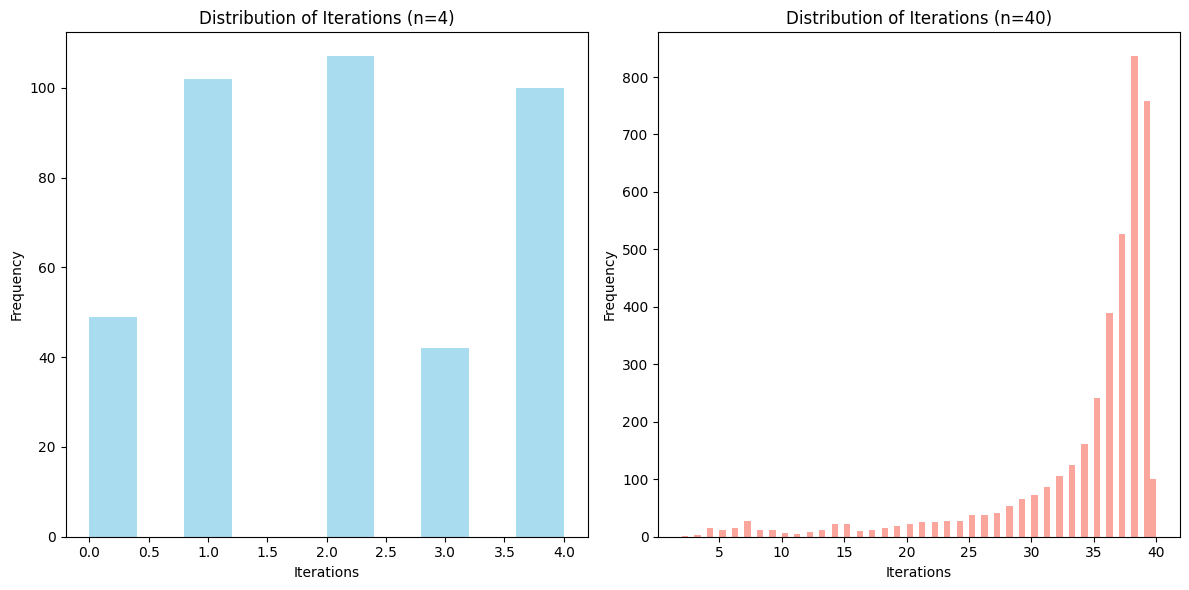

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gale_shapley(men_preferences, women_preferences):
    n = len(men_preferences)
    engaged = [-1] * n  # Inicialmente, nadie está comprometido
    men_proposals = [0] * n  # El número de propuestas que ha hecho cada hombre

    iterations = []

    while men_proposals.count(n) != n:  # Mientras haya hombres sin compromiso
        for man in range(n):
            if men_proposals[man] == n:
                continue  # El hombre ya ha propuesto a todas las mujeres
            woman = men_preferences[man][men_proposals[man]]
            men_proposals[man] += 1

            if engaged[woman] == -1:  # La mujer está libre
                engaged[woman] = man
            else:
                current_man = engaged[woman]
                if women_preferences[woman].index(man) < women_preferences[woman].index(current_man):
                    engaged[woman] = man
                    men_proposals[current_man] = n  # El hombre pierde su compromiso

        iterations.append(men_proposals.count(n))

    return iterations

def run_experiment(n, num_trials):
    all_iterations = []
    min_iterations = float('inf')
    max_iterations = 0
    total_iterations = 0

    for _ in range(num_trials):
        men_pref = [np.random.permutation(n).tolist() for _ in range(n)]
        women_pref = [np.random.permutation(n).tolist() for _ in range(n)]
        iterations = gale_shapley(men_pref, women_pref)
        all_iterations.extend(iterations)

        min_iterations = min(min_iterations, min(iterations))
        max_iterations = max(max_iterations, max(iterations))
        total_iterations += sum(iterations)

    avg_iterations = total_iterations / (n * num_trials)

    return all_iterations, min_iterations, max_iterations, avg_iterations

# For n=4
n = 4
num_trials = 100
iterations_4, min_iter_4, max_iter_4, avg_iter_4 = run_experiment(n, num_trials)

# For n=40
n = 40
iterations_40, min_iter_40, max_iter_40, avg_iter_40 = run_experiment(n, num_trials)

# Results
print("For n=4:")
print(f"Minimum iterations: {min_iter_4}")
print(f"Maximum iterations: {max_iter_4}")
print(f"Average iterations: {avg_iter_4}")

print("\nFor n=40:")
print(f"Minimum iterations: {min_iter_40}")
print(f"Maximum iterations: {max_iter_40}")
print(f"Average iterations: {avg_iter_40}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(iterations_4, bins='auto', alpha=0.7, color='skyblue')
plt.title('Distribution of Iterations (n=4)')
plt.xlabel('Iterations')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(iterations_40, bins='auto', alpha=0.7, color='salmon')
plt.title('Distribution of Iterations (n=40)')
plt.xlabel('Iterations')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## 3. Simulate the the Gale-Shapley and Irving algorithms using random preference lists , for n=4 and 40 and generate a gift animation

In [ ]:
from PIL import Image, ImageDraw
import random

def generate_random_preferences(n):
    preferences = {}
    for i in range(n):
        preferences[i] = list(range(n))
        random.shuffle(preferences[i])
    return preferences

def gale_shapley_animation(preferences):
    n = len(preferences)
    men = list(range(n))
    women = list(range(n))
    engagements = {}
    snapshots = []  # Store snapshots for GIF

    while len(engagements) < n:
        snapshot = draw_snapshot(engagements, men, women, n)
        snapshots.append(snapshot)

        if not men:
            break  # Terminate if all men are engaged

        man = men.pop(0)
        if not preferences[man]:
            continue  # Skip if the preference list is empty
        woman = preferences[man].pop(0)
        current_engagement = engagements.get(woman)
        if current_engagement is None:
            engagements[woman] = man
        else:
            woman_preferences = preferences[woman]
            if man in woman_preferences and current_engagement in woman_preferences:
                if woman_preferences.index(man) < woman_preferences.index(current_engagement):
                    engagements[woman] = man
                    men.append(current_engagement)

    # Ensure all women are engaged
    for woman in women:
        if woman not in engagements:
            engagements[woman] = None  # Assign None to unengaged women

    return snapshots

def draw_snapshot(engagements, men, women, n):
    img = Image.new("RGB", (2000, 200), (255, 255, 255))
    draw = ImageDraw.Draw(img)
    cell_size = 50

    for i in range(n):
        draw.rectangle([(i * cell_size, 0), ((i + 1) * cell_size, cell_size)], outline="black")
        draw.rectangle([(i * cell_size, cell_size), ((i + 1) * cell_size, cell_size * 2)], outline="black")
        man = engagements.get(i)
        if man is not None:
            if man is not None:
                draw.text(((i * cell_size) + 10, 10), f"Man {man}", fill="black")
        draw.text(((i * cell_size) + 10, cell_size + 10), f"Woman {i}", fill="black")

    return img

n = 40
preferences = generate_random_preferences(n)
snapshots = gale_shapley_animation(preferences)

snapshots[0].save(
    "gale_shapley_animation40.gif",
    save_all=True,
    append_images=snapshots[1:],
    loop=0,
    duration=500,
)


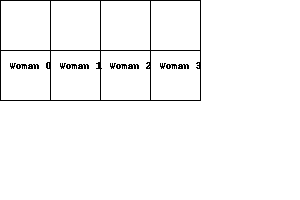

In [ ]:
from IPython.display import Image
from IPython.display import display

# Display the GIF
display(Image(filename='gale_shapley_animation4.gif'))

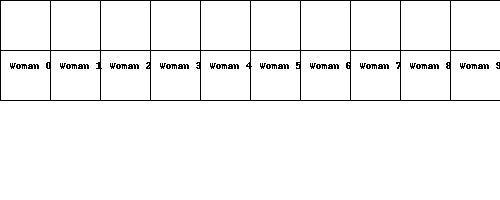

In [ ]:
from IPython.display import Image
from IPython.display import display
display(Image(filename='gale_shapley_animation10.gif'))


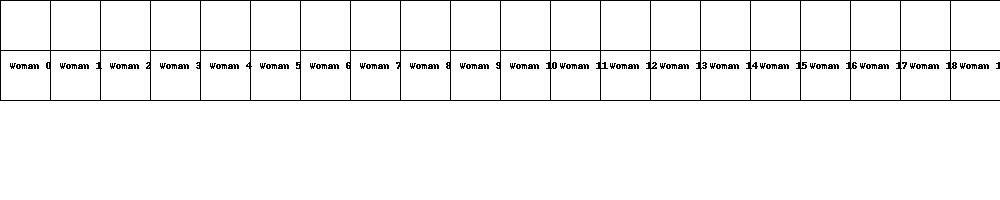

In [ ]:
from IPython.display import Image
from IPython.display import display
display(Image(filename='gale_shapley_animation20.gif'))

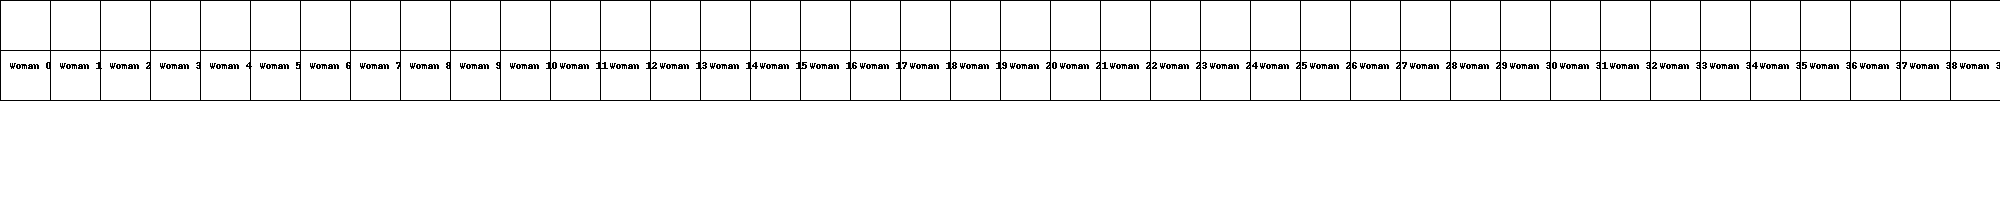

In [ ]:
from IPython.display import Image
from IPython.display import display
display(Image(filename='gale_shapley_animation40.gif'))

In [ ]:
from PIL import Image, ImageDraw
import random

def generate_random_preferences(n):
    preferences = {}
    for i in range(n):
        preferences[i] = list(range(n))
        random.shuffle(preferences[i])
    return preferences

def irving_animation(preferences):
    n = len(preferences)
    men = list(range(n))
    women = list(range(n))
    engagements = {}
    proposals = {man: {} for man in men}
    snapshots = []  # Store snapshots for GIF

    while len(engagements) < n:
        snapshot = draw_snapshot(engagements, men, women, n)
        snapshots.append(snapshot)

        if not men:
            break  # Terminate if all men are engaged

        man = men.pop(0)
        while True:
            woman = preferences[man].pop(0)
            if woman not in proposals[man]:
                proposals[man][woman] = True
                current_engagement = engagements.get(woman)
                if current_engagement is None:
                    engagements[woman] = man
                    break
                else:
                    woman_preferences = preferences[woman]
                    if man in woman_preferences and current_engagement in woman_preferences:
                        if woman_preferences.index(man) < woman_preferences.index(current_engagement):
                            engagements[woman] = man
                            men.append(current_engagement)
                            break

    # Ensure all women are engaged
    for woman in women:
        if woman not in engagements:
            engagements[woman] = None  # Assign None to unengaged women

    return snapshots

def draw_snapshot(engagements, men, women, n):
    img = Image.new("RGB", (2000, 200), (255, 255, 255))
    draw = ImageDraw.Draw(img)
    cell_size = 50

    for i in range(n):
        draw.rectangle([(i * cell_size, 0), ((i + 1) * cell_size, cell_size)], outline="black")
        draw.rectangle([(i * cell_size, cell_size), ((i + 1) * cell_size, cell_size * 2)], outline="black")
        man = engagements.get(i)
        if man is not None:
            if man is not None:
                draw.text(((i * cell_size) + 10, 10), f"Man {man}", fill="black")
        draw.text(((i * cell_size) + 10, cell_size + 10), f"Woman {i}", fill="black")

    return img

n = 40
preferences = generate_random_preferences(n)
snapshots = irving_animation(preferences)

snapshots[0].save(
    "irving_animation40.gif",
    save_all=True,
    append_images=snapshots[1:],
    loop=0,
    duration=500,
)


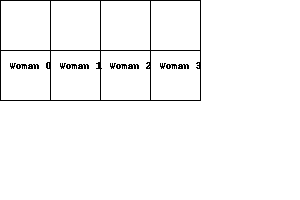

In [ ]:
from IPython.display import Image
from IPython.display import display
display(Image(filename='irving_animation4.gif'))

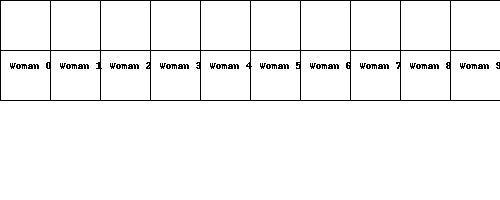

In [ ]:
from IPython.display import Image
from IPython.display import display
display(Image(filename='irving_animation10.gif'))

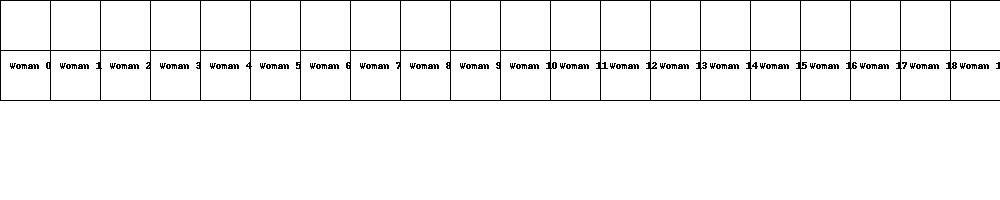

In [ ]:
from IPython.display import Image
from IPython.display import display
display(Image(filename='irving_animation20.gif'))

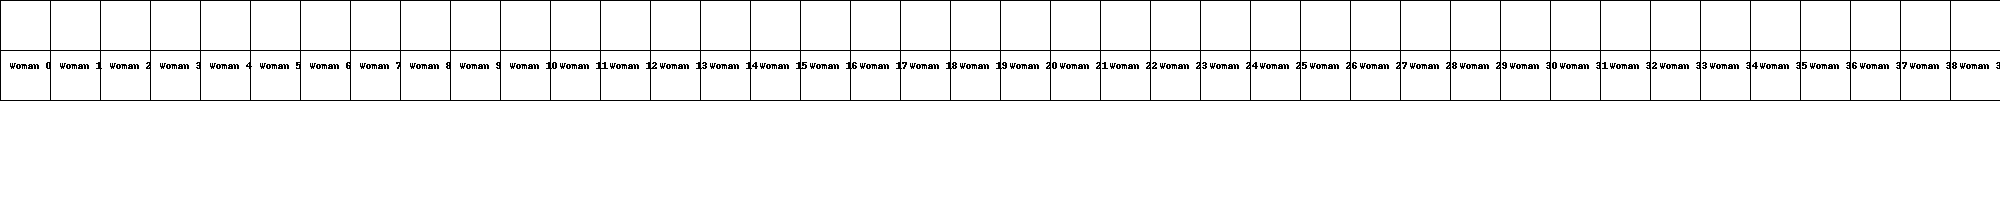

In [ ]:
from IPython.display import Image
from IPython.display import display
display(Image(filename='irving_animation40.gif'))